<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/Assignment%201%20Pandas/team%2011/MAAM__Assignment_big_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Group Members:**
1. MIKHEL ADAM BIN MUHAMMAD EZRIN (A20EC0237)
2. AHMAD MUHAIMIN BIN AHMAD HAMBALI (A20EC0006)



# **US Accidents (2016 - 2021) Analysis**

The dataset contains car accident information from all 49 states in the USA, and the data was gathered from February 2016 to December 2021. For this analysis, we will use Python and several libraries including mathplotlib, pandas, seaborn, and numpy as well as using sampling to perform our analysis.





## **Downloading the Dataset**

The dataset we'll be using is titled [US Accidents (2016 - 2021)](https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents), taken from Kaggle. Instead of downloading the data set onto our own system, we will be using an API command to download the dataset directly into Google Colab.



Before we start, we need to download our Kaggle API Token:
1. Go to [kaggle.com](https://kaggle.com) and sign in
2. On the top right of the page, click your profile picture and click on "Account"
3. Scroll down to the section called "API" and click  "Create API Token"
4. Save the kaggle.json file somewhere easy to locate


**Install Kaggle and matplotlib packages**

In [ ]:
!pip install kaggle
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Upload Kaggle API Token (kaggle.json)**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**API Command to download the dataset**

In [ ]:
!kaggle datasets download -d sobhanmoosavi/us-accidents

 98% 264M/269M [00:03<00:00, 71.0MB/s]
100% 269M/269M [00:03<00:00, 76.4MB/s]


In [ ]:
!unzip us-accidents.zip

Archive:  us-accidents.zip
  inflating: US_Accidents_Dec21_updated.csv  


## **Data Preparation and Cleaning**

In this section, we will perform data cleaning by removing any null values and changing certain data types to make it easier to analyze the data.


**Importing Pandas, Numpy, Seaborn, random, and matplotlib packages**

In [ ]:
import matplotlib
import pandas as pd
import seaborn as sns
import random
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Reading the dataset into the DataFrame
df = pd.read_csv("US_Accidents_Dec21_updated.csv")
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
import pandas as pd
%%time
df = pd.read_csv("US_Accidents_Dec21_updated.csv")
df

UsageError: Line magic function `%%time` not found.


**Sampling the data**

In [ ]:
n = sum(1 for line in open("US_Accidents_Dec21_updated.csv"))-1  # Calculate number of rows in file
s = n//10  # sample size of 10%
skip = sorted(random.sample(range(1, n+1), n-s))  # n+1 to compensate for header 
df = pd.read_csv("US_Accidents_Dec21_updated.csv", skiprows=skip)
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-41,2,2016-02-09 17:12:40,2016-02-09 23:12:40,41.474610,-81.711820,41.470230,-81.741880,1.585,Between 41st St/Exit 169 and OH-10/Lorain Ave/...,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-61,2,2016-02-10 09:34:38,2016-02-10 15:34:38,41.035566,-81.569917,41.036015,-81.579895,0.521,At OH-619/Wooster Rd/Exit 17 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-63,2,2016-02-10 10:21:52,2016-02-10 16:21:52,41.851914,-80.175232,41.858231,-80.176444,0.441,At US-6/Exit 166 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
3,A-66,2,2016-02-10 11:55:16,2016-02-10 17:55:16,41.668050,-83.570630,41.665530,-83.565320,0.325,At US-24/Detroit Ave/Exit 203 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-85,2,2016-02-11 06:35:24,2016-02-11 12:35:24,41.420990,-81.690520,41.411000,-81.668850,1.318,At OH-176/OH-17/Exit 17 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284529,A-2845300,3,2019-08-23 16:10:18,2019-08-23 16:39:48,37.423270,-121.915790,37.415540,-121.913570,0.548,Ramp to Great Mall Pky - Accident. Two lanes b...,...,False,False,False,False,False,False,Day,Day,Day,Day
284530,A-2845314,2,2019-08-23 13:54:51,2019-08-23 14:21:56,33.940680,-117.267470,33.940810,-117.257280,0.584,At Frederick St/Pigeon Pass Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
284531,A-2845317,2,2019-08-23 14:03:54,2019-08-23 14:32:09,34.059680,-118.001300,34.070000,-118.000260,0.716,At I-10/San Bernardino Fwy - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
284532,A-2845318,2,2019-08-23 14:19:41,2019-08-23 14:47:28,34.153160,-118.358300,34.153320,-118.361510,0.184,At Cahuenga Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


**Checking and visualizing number of null/missing values**

In [ ]:
df.isna().sum()

ID                            0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                       0
End_Lng                       0
Distance(mi)                  0
Description                   0
Number                   174761
Street                        0
Side                          0
City                         13
County                        0
State                         0
Zipcode                     135
Country                       0
Timezone                    382
Airport_Code                918
Weather_Timestamp          4999
Temperature(F)             6847
Wind_Chill(F)             46938
Humidity(%)                7234
Pressure(in)               5828
Visibility(mi)             6935
Wind_Direction             7312
Wind_Speed(mph)           15881
Precipitation(in)         54727
Weather_Condition          6990
Amenity                       0
Bump    

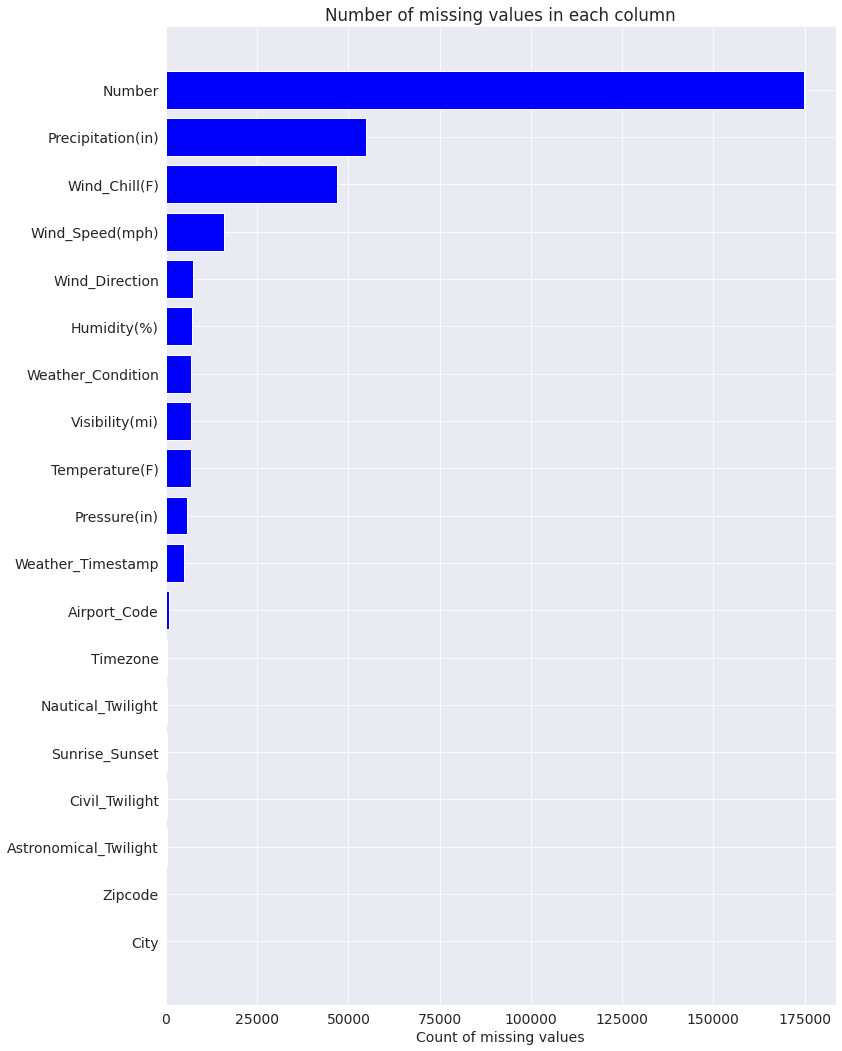

In [ ]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name','missing_count']
missing_df = missing_df[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.5
fig,ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind,missing_df.missing_count.values,color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

**Dropping rows that have null values and columns that we find unimportant**

In [ ]:
df = df.dropna()
df = df.drop(['Zipcode', 'Airport_Code', 'Number'], axis=1)

In [ ]:
df.isna().sum()

ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Country                  0
Timezone                 0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
T

**Converting "Start_Time" & "End_Time" into datetime objects**

In [ ]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

**Examining the information about the dataset to determine the data types of the attributes.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94206 entries, 403 to 284525
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     94206 non-null  object        
 1   Severity               94206 non-null  int64         
 2   Start_Time             94206 non-null  datetime64[ns]
 3   End_Time               94206 non-null  datetime64[ns]
 4   Start_Lat              94206 non-null  float64       
 5   Start_Lng              94206 non-null  float64       
 6   End_Lat                94206 non-null  float64       
 7   End_Lng                94206 non-null  float64       
 8   Distance(mi)           94206 non-null  float64       
 9   Description            94206 non-null  object        
 10  Street                 94206 non-null  object        
 11  Side                   94206 non-null  object        
 12  City                   94206 non-null  object        
 13

## **Exploratory Analysis and Visualization**

In this part, we will analyze various aspects of the dataset and present our findings using visualizations provided by the packages that have been downloaded.


**Calculating the average wind speed for each state**

In [ ]:
Avg_windSpeed = df.groupby('State').apply(lambda x: x['Wind_Speed(mph)'].mean()).reset_index(name= "Average Wind Speed by State(mph)")
pd.set_option('display.precision',2)
Avg_windSpeed

,State,Average Wind Speed by State(mph)
0,AL,5.38
1,AR,6.27
2,AZ,6.69
3,CA,5.93
4,CO,9.15
5,CT,6.54
6,DC,7.38
7,DE,9.22
8,FL,8.27
9,GA,5.51


**Sum of accidents for each state**

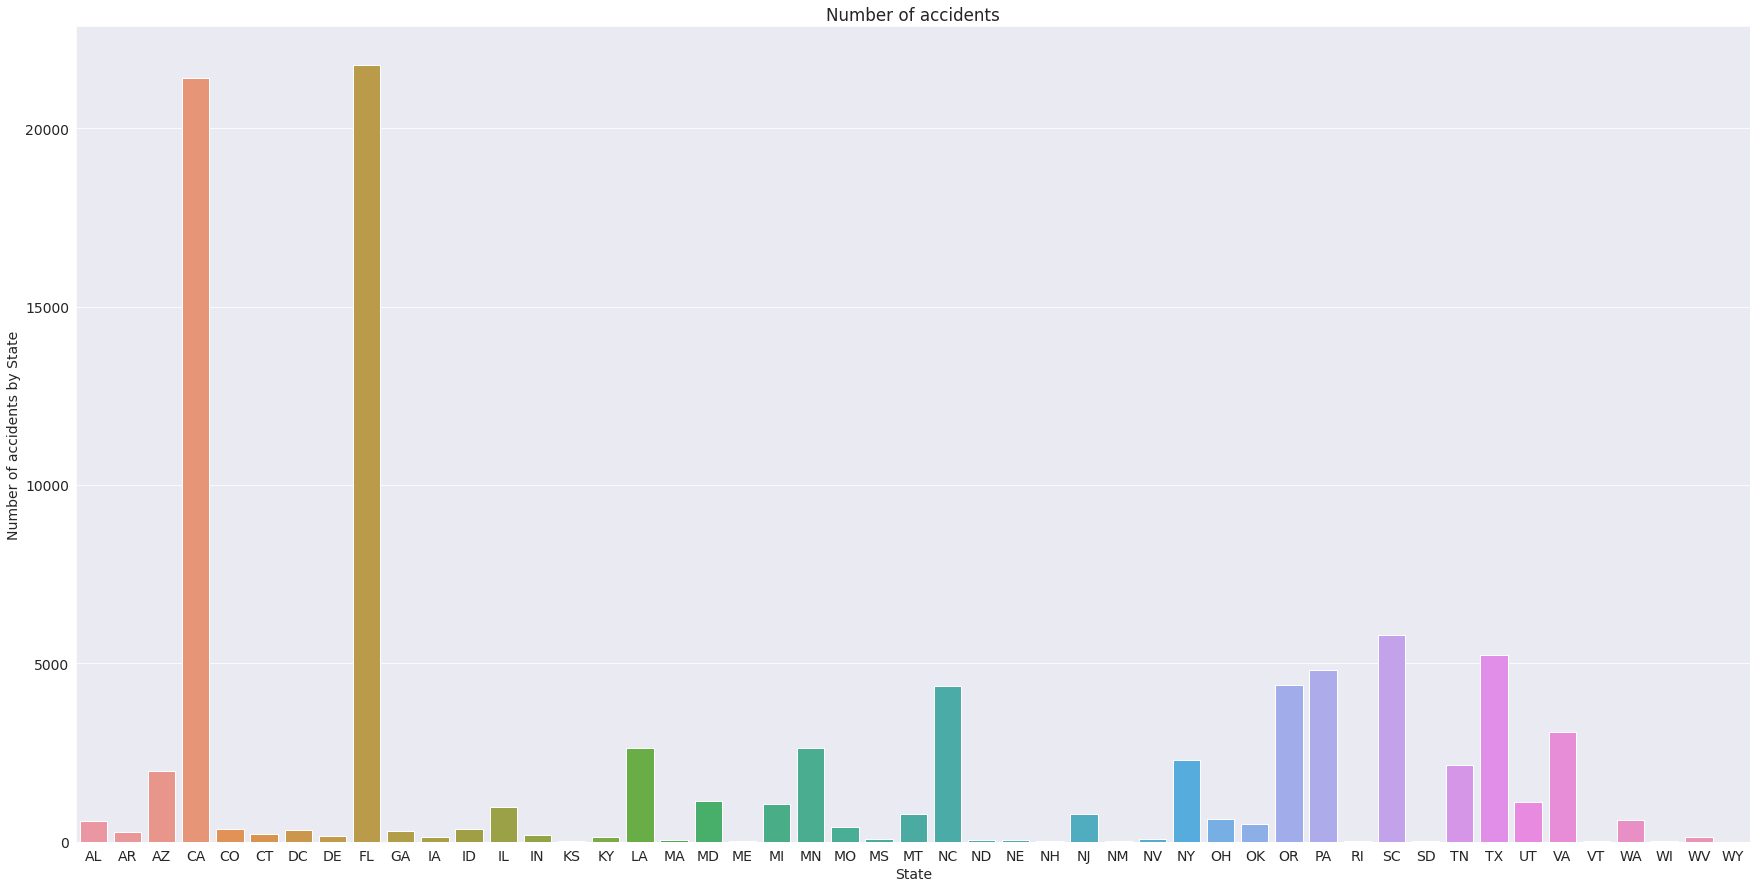

In [ ]:
state = df.groupby('State').apply(lambda x: len(x['ID'])).reset_index(name= "number acc")
fig, ax = plt.subplots(figsize=(30, 15))
sns.barplot(x=state['State'], y=state['number acc'])
ax.set(xlabel ="State", ylabel = "Number of accidents by State", title ='Number of accidents')
plt.show()

**Interesting Notes**

>Most accidents occur in the state of Florida

**Probability of Severity level that a future accident could have**

Text(0, 0.5, 'Probability Density')

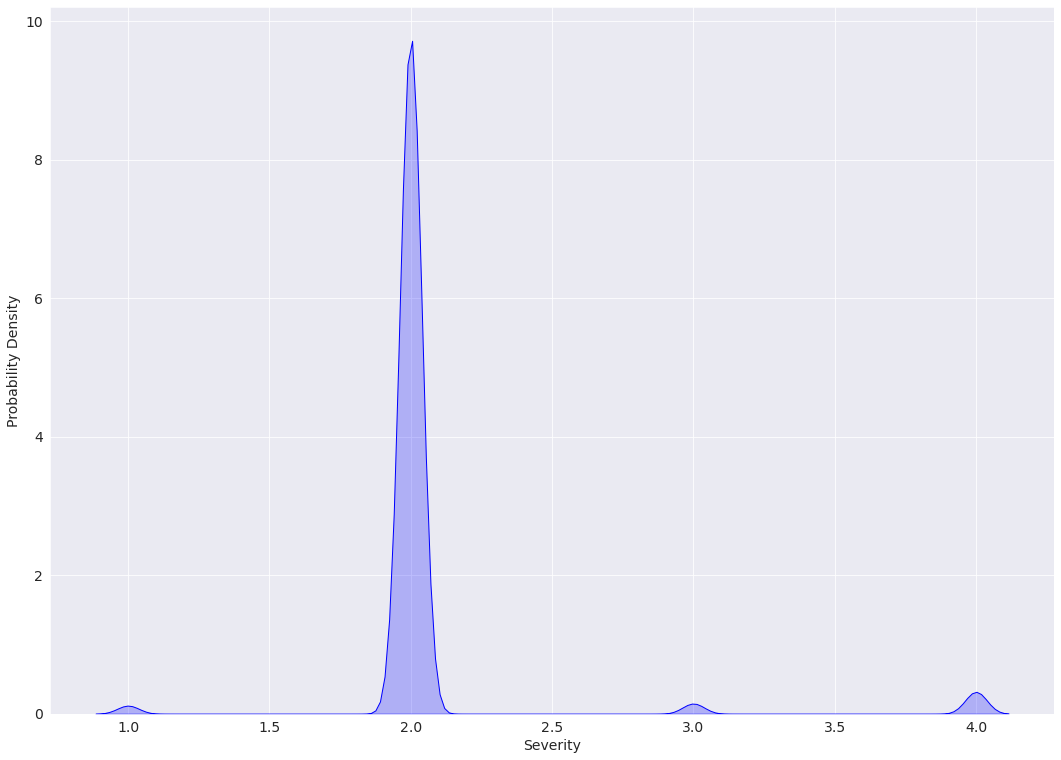

In [ ]:
# Plotting the KDE Plot
# sns.kdeplot(df.loc[(df['State']=='CA'),
#             'Severity'], color='r', shade=True, label='California')

# sns.kdeplot(df.loc[(df['State']=='FL'),
#             'Severity'], color='b', shade=True, label='Florida')

# sns.kdeplot(df.loc[(df['State']=='NY'),
#             'Severity'], color='g', shade=True, label='New York') 

fig, ax = plt.subplots(figsize=(18, 13))
sns.kdeplot(df['Severity'],color='blue',shade=True, ax= ax)


# Setting the X and Y Label
plt.xlabel('Severity')
plt.ylabel('Probability Density')

**Interesting Notes**

>Accidents are most likely to have a severity level of 2

## **Asking and Answering Questions**

In this part we will be asking questions and answering them by creating visualizations when possible to see if we can gather any useful information.


#### **Q1: How many accidents had a Severity Level of 4?**

In [ ]:
severity_df = pd.DataFrame(df['Severity'].value_counts()).rename(columns={'index':'Severity', 'Severity':'No. of Cases'})
severity_df = severity_df.rename_axis('Severity').reset_index()
severity_df.loc[severity_df['Severity'] == 4]

,Severity,No. of Cases
1,4,2884


**Description**

> There were 2884 accidents that had a severity level of 4



#### **How is traffic affected by the majority of accidents that happen**

In [ ]:
accident_duration_df = pd.DataFrame(df['End_Time'] - df['Start_Time']).reset_index().rename(columns={'index':'Id', 0:'Duration'})

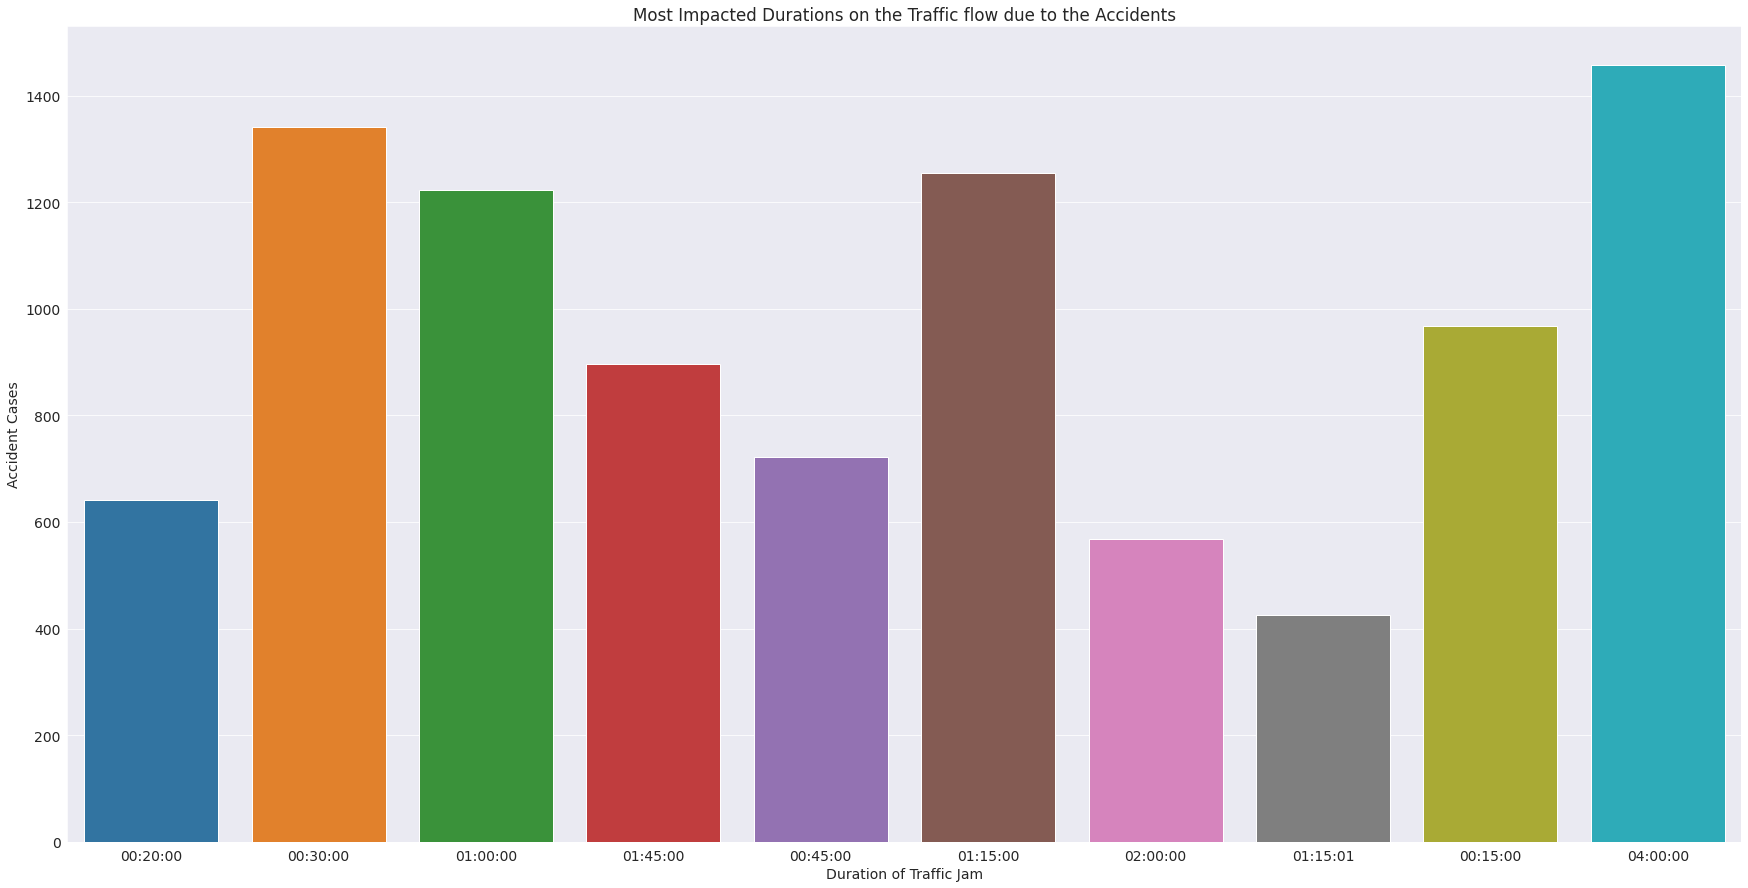

In [ ]:
top_10_accident_duration_df = pd.DataFrame(accident_duration_df['Duration'].value_counts().head(10).sample(frac = 1)).reset_index().rename(columns={'index':'Duration', 'Duration':'Cases'})

Duration = [str(i).split('days')[-1].strip() for i in top_10_accident_duration_df.Duration]

top_10_accident_duration_df['Duration'] = Duration


fig, ax = plt.subplots(figsize=(30, 15))
sns.barplot(x='Duration', y='Cases', data =top_10_accident_duration_df)
ax.set(xlabel ="Duration of Traffic Jam", ylabel = "Accident Cases", title ='Most Impacted Durations on the Traffic flow due to the Accidents')
plt.show()

**Description**

> Majority of accidents that happened has affected traffic flow to be delayed by four hours.



#### **As the years go by, what is the trend of accidents that occur?**

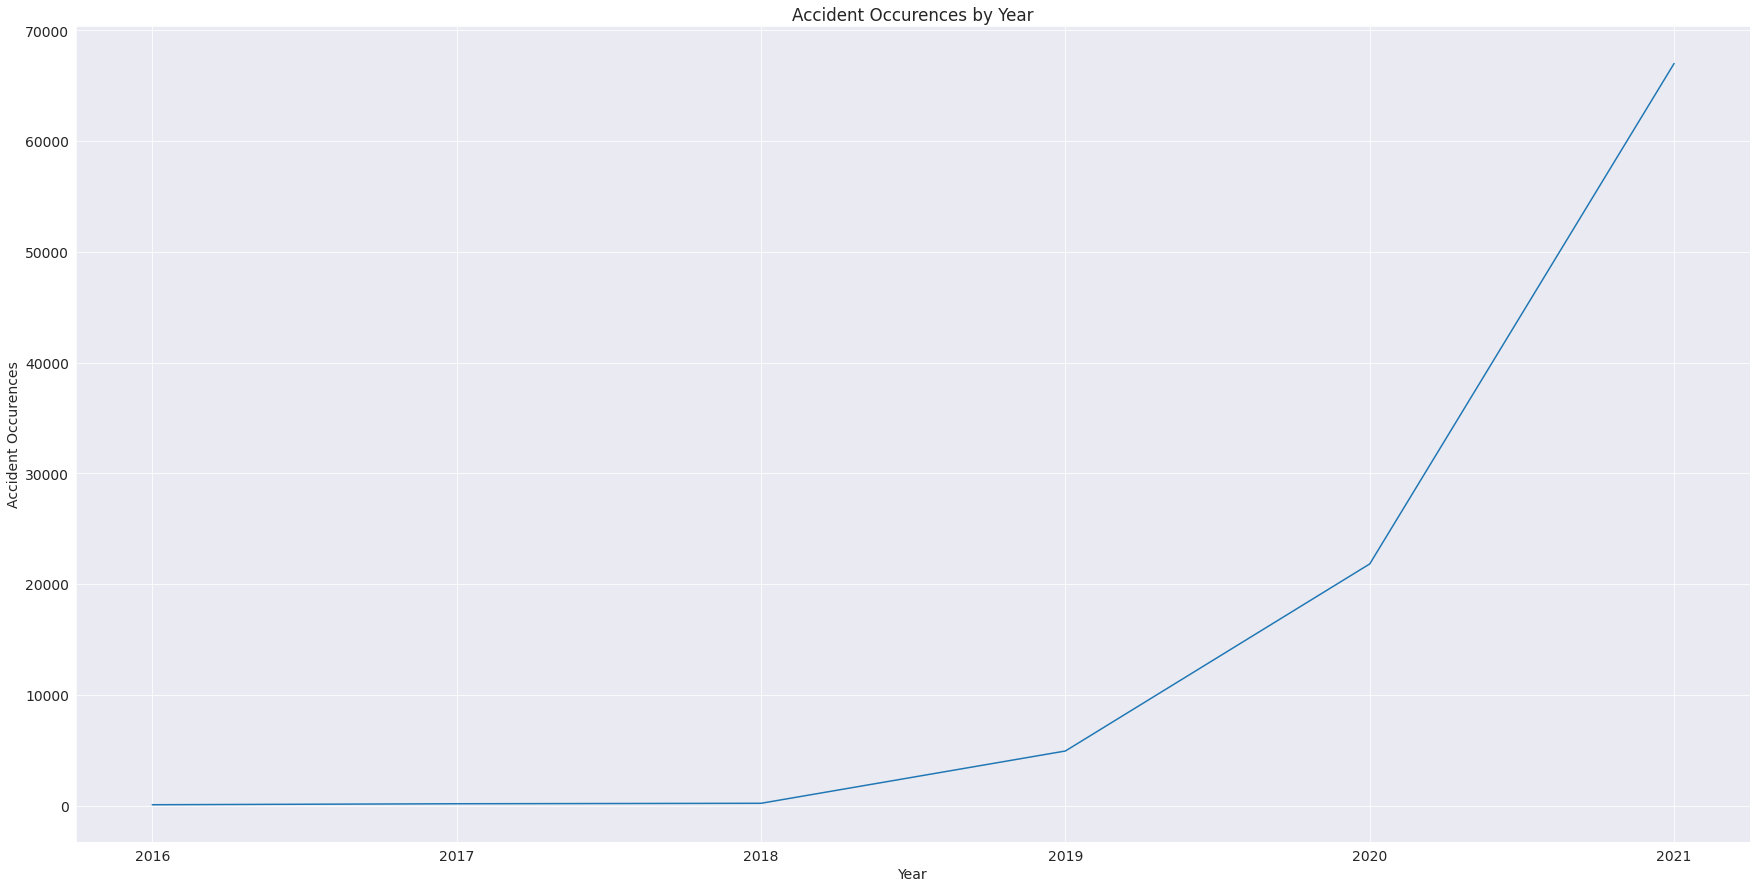

In [ ]:
years = df.groupby(df.Start_Time.dt.year).apply(lambda x: x['ID'].count()).reset_index(name='count')
fig, ax = plt.subplots(figsize=(30, 15))
ax.set(xlabel ="Year", ylabel = "Accident Occurences", title ='Accident Occurences by Year')
sns.lineplot(x='Start_Time' , y= 'count', data= years)

**Description**

> Based on the trend line, we can see that as the years go by, the number of accidents increases exponentially.



#### **Q4: Which severity level has the most number of accidents?**

In [ ]:
mostFrequentSeverity = df.Severity.value_counts().reset_index(name='Count')
mostFrequentSeverity

,index,Count
0,2,88893
1,4,2884
2,3,1352
3,1,1077


[Text(0, 0.5, 'Accident Occurences'),
 Text(0.5, 0, 'Severity'),
 Text(0.5, 1.0, 'Accident Occurences by Severity')]

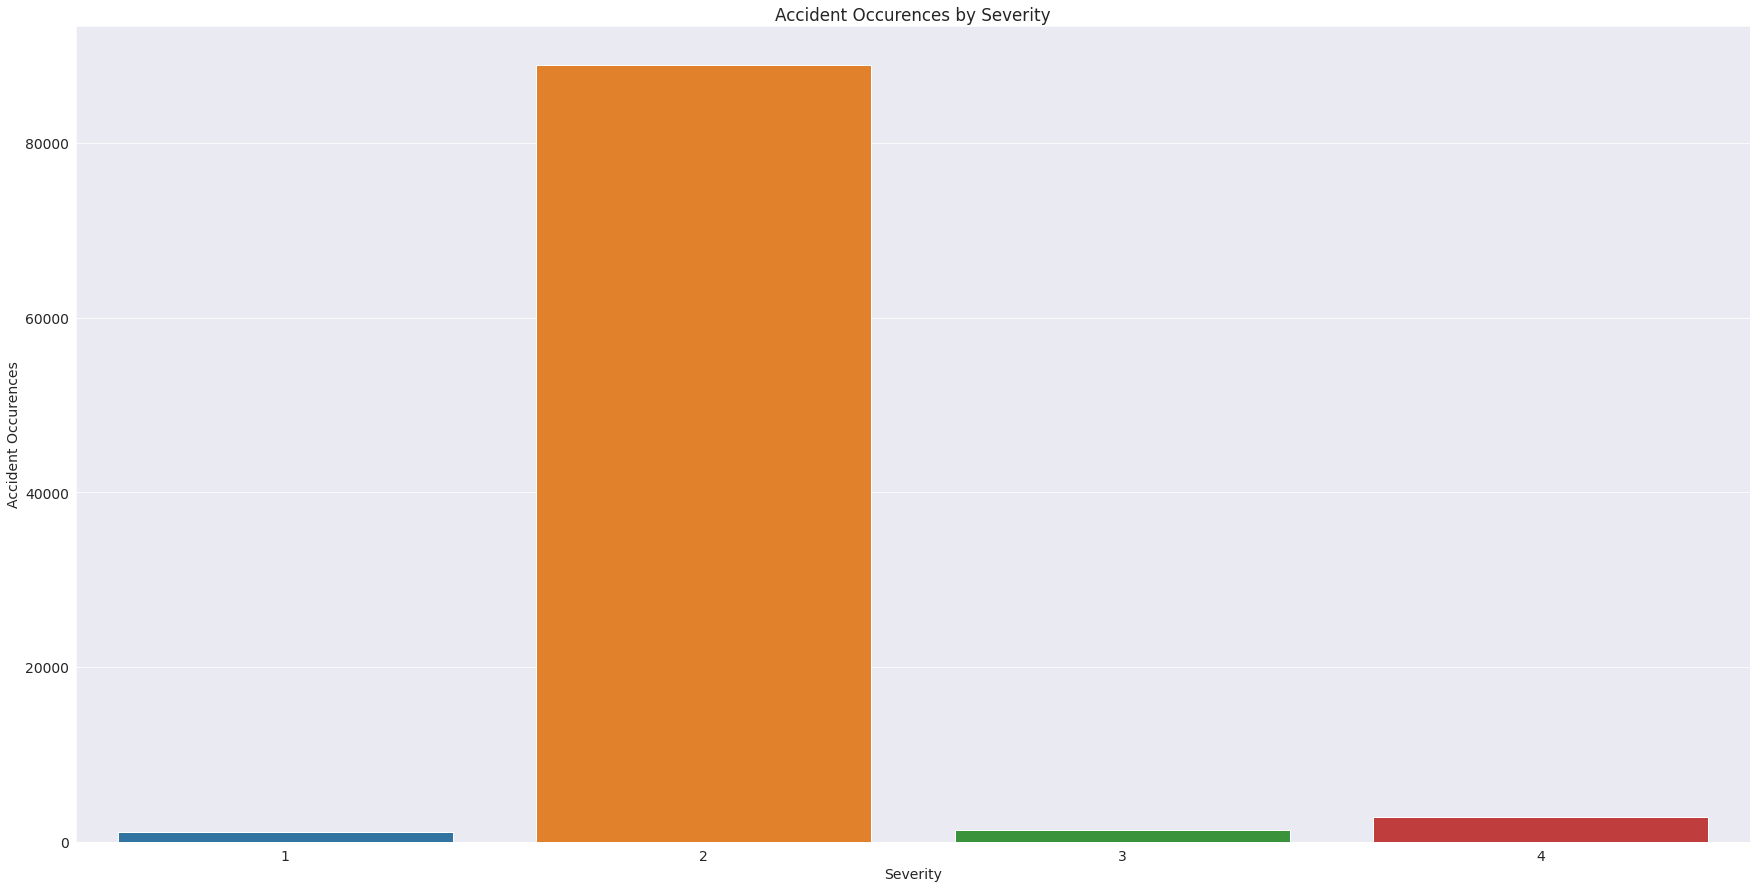

In [ ]:
fig, ax = plt.subplots(figsize=(30, 15))
sns.barplot(x='index', y='Count', data =mostFrequentSeverity)
ax.set(xlabel ="Severity", ylabel = "Accident Occurences", title ='Accident Occurences by Severity')

**Description**

> As we can see, severity level 2 had the most number of accidents.



#### **Q5: Which weather condition do the most accidents occur?**

In [ ]:
weather = df.groupby('Weather_Condition').apply(lambda x: len(x['ID'])).reset_index(name = 'accident')
weather.iloc[weather['accident'].idxmax()]

Weather_Condition     Fair
accident             46472
Name: 9, dtype: object

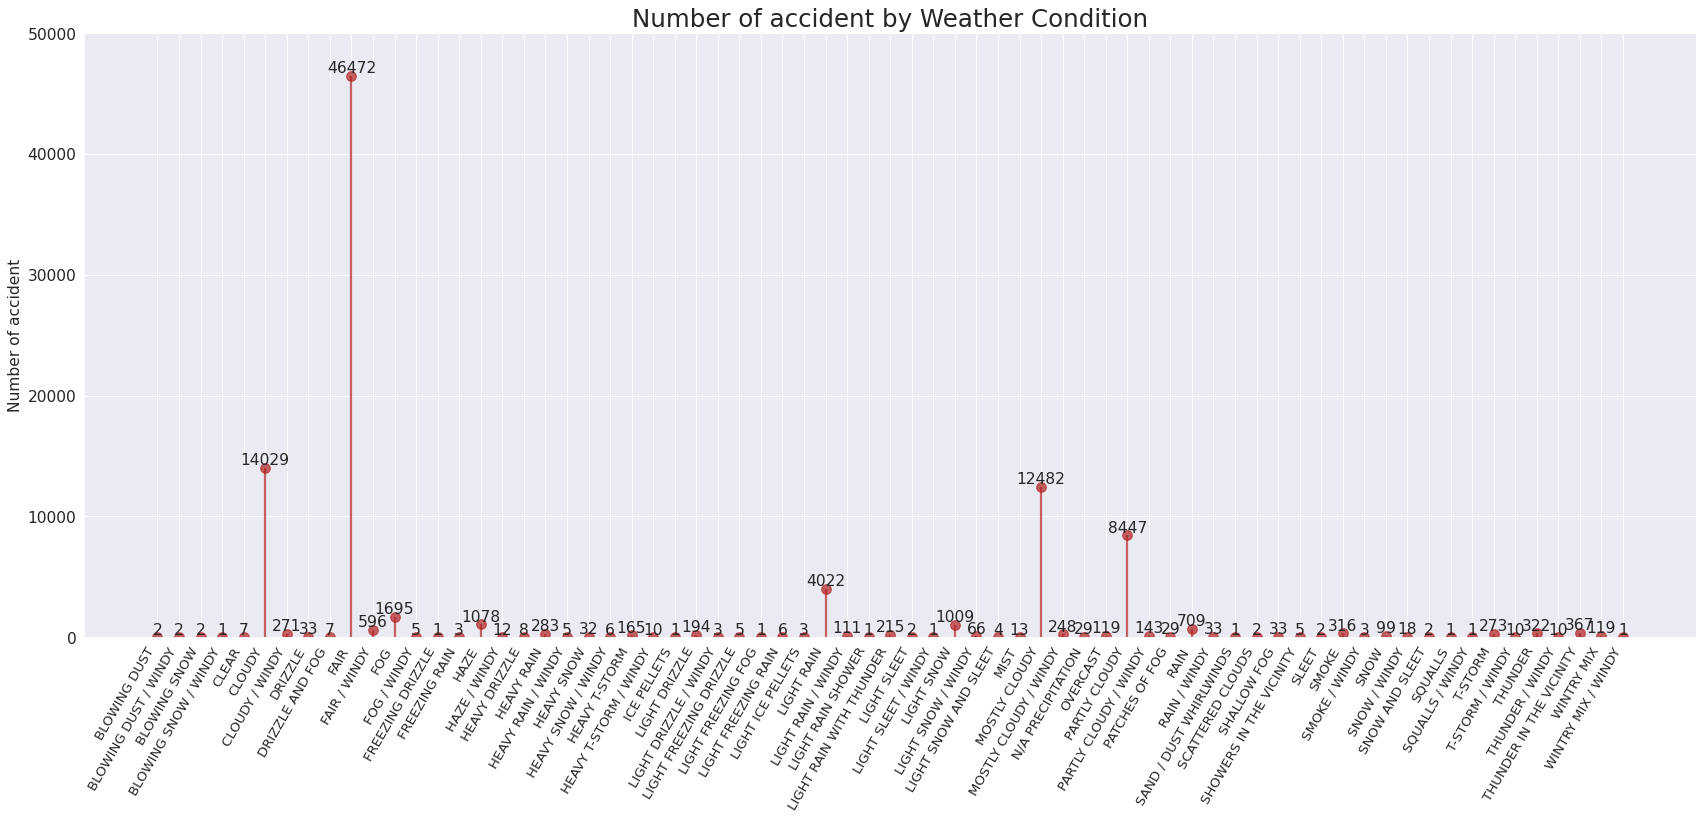

In [ ]:
fig, ax = plt.subplots(figsize=(26,10), dpi= 80)
ax.vlines(x='Weather_Condition', ymin=0, ymax='accident',data=weather, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x='Weather_Condition', y='accident',data=weather ,s=75, color='firebrick', alpha=0.7)

ax.set_title('Number of accident by Weather Condition', fontdict={'size':22})
ax.set_ylabel('Number of accident')
ax.set_xticks(weather.index)
ax.set_xticklabels(weather.Weather_Condition.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 50000)

for row in weather.itertuples():
    ax.text(row.Index, row.accident+.5, s=round(row.accident, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()

**Description**

> Surprisingly, most accidents occur when the weather is fair.



## **Inferences and Conclusion**

Based on the analysis, it can be concluded that there has been a significant number of accidents in the area, with many of them causing delays in traffic and having a severity level of 2. The number of accidents appears to be increasing over time, and most of them occurred under fair weather conditions. These findings suggest that there may be multiple factors contributing to the high number of accidents, and it may be necessary to implement measures to address and prevent them. It would be helpful to further analyze the causes of the accidents and specific contributing factors, such as road conditions, driver behavior, and environmental factors, in order to develop targeted solutions.

## **References and Future Work**

[Charts in Colaboratory Notebook](https://colab.research.google.com/notebooks/charts.ipynb
)

[Seaborn Website](http://seaborn.pydata.org/)

There are several potential future projects that could be undertaken using this dataset which include:

Identifying the main causes of the accidents: By analyzing additional data such as the type of vehicles involved, the road conditions, and the weather at the time of the accident, it may be possible to identify the main causes of the accidents and develop targeted prevention measures.

Developing a predictive model for accidents: By analyzing historical data on the accidents, it may be possible to build a predictive model that can forecast the likelihood of future accidents based on various factors such as the time of day, the type of road, and the weather conditions.

